In [1]:
import os
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from PIL import Image
from glob import glob
from google.colab import drive

In [2]:
#Mounting the drive
drive.mount('/content/gdrive')
#Setting kaggle configuration directory
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
%cd /content/gdrive/My Drive/Kaggle
#Downloading and unzip dataset
!kaggle datasets download -d moltean/fruits
!unzip \*.zip && rm *.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/T

In [6]:
#Printing all file names under the input directory
for dirname, _, filenames in os.walk('./fruits-360-original-size'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Görüntülenen çıkış son 5000 satıra kısaltıldı.
./fruits-360-original-size/fruits-360-original-size/Training/apple_red_yellow_1/r0_94.jpg
./fruits-360-original-size/fruits-360-original-size/Training/apple_red_yellow_1/r0_96.jpg
./fruits-360-original-size/fruits-360-original-size/Training/apple_red_yellow_1/r0_98.jpg
./fruits-360-original-size/fruits-360-original-size/Training/apple_red_yellow_1/r1_0.jpg
./fruits-360-original-size/fruits-360-original-size/Training/apple_red_yellow_1/r1_10.jpg
./fruits-360-original-size/fruits-360-original-size/Training/apple_red_yellow_1/r1_100.jpg
./fruits-360-original-size/fruits-360-original-size/Training/apple_red_yellow_1/r1_102.jpg
./fruits-360-original-size/fruits-360-original-size/Training/apple_red_yellow_1/r1_104.jpg
./fruits-360-original-size/fruits-360-original-size/Training/apple_red_yellow_1/r1_106.jpg
./fruits-360-original-size/fruits-360-original-size/Training/apple_red_yellow_1/r1_108.jpg
./fruits-360-original-size/fruits-360-original-si

In [13]:
#Setting Training & Test dir paths
train_path = './fruits-360-original-size/fruits-360-original-size/Training/'
test_path = './fruits-360-original-size/fruits-360-original-size/Test/'

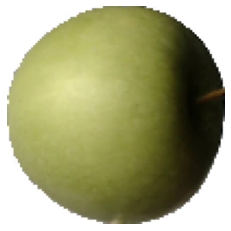

(100, 100, 3)


In [15]:
#Displaying the image
img = load_img(train_path + "apple_granny_smith_1/r1_316.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()

#Printing the shape of the image array 
x = img_to_array(img)
print(x.shape)

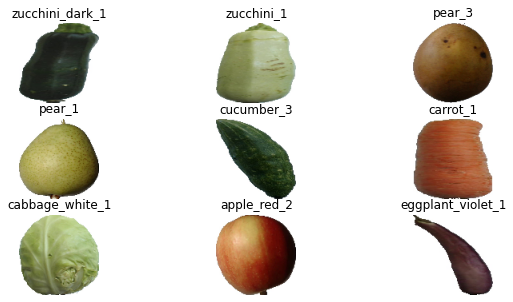

In [16]:
#Visualizing more Images
images = ['zucchini_dark_1', 'zucchini_1', 'pear_3', 'pear_1', 'cucumber_3', 'carrot_1', 'cabbage_white_1','apple_red_2', 'eggplant_violet_1']
fig = plt.figure(figsize =(10,5))
for i in range(len(images)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + images[i] +"/r0_100.jpg", target_size=(100,100)))

In [17]:
#Storing occurences of fruits in a list
fruits = []
fruits_image = []
for i in os.listdir(train_path):
    for image_filename in os.listdir(train_path + i):
        fruits.append(i) 
        fruits_image.append(i + '/' + image_filename)
#Finding top 10 frequent Fruits
newData = Counter(fruits)
frequent_fruits = newData.most_common(10)
print("Top 10 frequent Fruits:")
frequent_fruits

Top 10 frequent Fruits:


[('apple_hit_1', 468),
 ('pear_1', 326),
 ('apple_braeburn_1', 320),
 ('apple_granny_smith_1', 320),
 ('apple_rotten_1', 319),
 ('apple_crimson_snow_1', 318),
 ('apple_red_2', 318),
 ('apple_golden_3', 316),
 ('apple_6', 315),
 ('apple_pink_lady_1', 313)]

In [18]:
#Finding number of classes
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

24


In [19]:
#Creating the model
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class)) 
model.add(Activation("softmax"))

#Compiling the model
model.compile(loss = "categorical_crossentropy",
optimizer = "rmsprop",
metrics = ["accuracy"])

#Getting model's summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                    

In [20]:
#Specifing epochs & batch size
epochs = 100
batch_size = 64

In [21]:
#Creating an object of ImageDataGenerator.
train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range = 0.3,
horizontal_flip=True,
zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale= 1./255)

#Generating batches of Augmented data.
train_generator = train_datagen.flow_from_directory(
directory = train_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
directory = test_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

Found 6231 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.


In [22]:
#Fitting the model
hist = model.fit_generator(
generator = train_generator,
steps_per_epoch = 1600 // batch_size,
epochs=epochs,
validation_data = test_generator,
validation_steps = 800 // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/100
25/25 [==============================] - 48s 2s/step - loss: 2.8118 - accuracy: 0.1650 - val_loss: 1.9173 - val_accuracy: 0.3542
Epoch 2/100
25/25 [==============================] - 42s 2s/step - loss: 1.8996 - accuracy: 0.3566 - val_loss: 1.2265 - val_accuracy: 0.6250
Epoch 3/100
25/25 [==============================] - 42s 2s/step - loss: 1.4059 - accuracy: 0.5215 - val_loss: 0.8011 - val_accuracy: 0.7617
Epoch 4/100
25/25 [==============================] - 41s 2s/step - loss: 1.0755 - accuracy: 0.6222 - val_loss: 0.5950 - val_accuracy: 0.8268
Epoch 5/100
25/25 [==============================] - 41s 2s/step - loss: 0.9311 - accuracy: 0.6850 - val_loss: 0.5131 - val_accuracy: 0.8359
Epoch 6/100
25/25 [==============================] - 46s 2s/step - loss: 0.7202 - accuracy: 0.7550 - val_loss: 0.3922 - val_accuracy: 0.8594
Epoch 7/100
25/25 [==============================] - 40s 2s/step - loss: 0.7230 - accuracy: 0.7505 - val_loss: 0.6772 - val_accuracy: 0.7461
Epoch 8/100
2

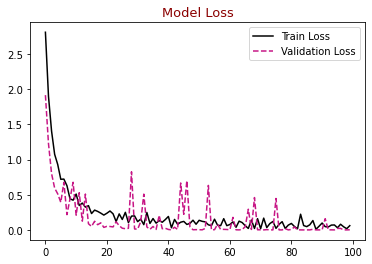

In [26]:
#Plotting train & validation loss
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "blue", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

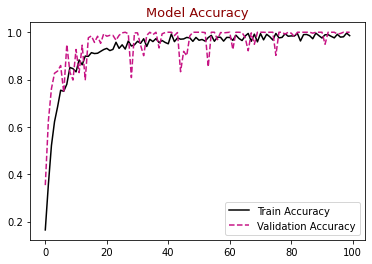

In [27]:
#Plotting train & validation accuracy
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "blue", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

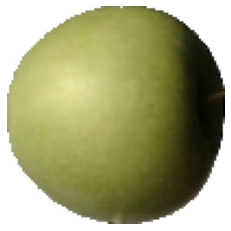

In [29]:
#Displaying the selected image
img = load_img(test_path + "/apple_granny_smith_1/r1_311.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Loading the image 
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image
image = load('./fruits-360-original-size/fruits-360-original-size/Test/apple_granny_smith_1/r1_311.jpg')

In [ ]:
#Predicting the class
prediction = (np.argmax(model.predict(image), axis=-1))
print(prediction)

In [ ]:
#Printing class dictionary
print(test_generator.class_indices)